<h1><b> House Grade Prediction </b></h1>

<h3><b> Overview :- </b></h3>
<h5>Find The Best House: The 1234ABC Realtors limited is in great losses due to the autmoation in the industry and the new innovations and players in the real estate market . So they have hired a Data Science Team to give them a business solution so as to help regain their place in the market.<br>
<br>
In order to do that, the group thought of a compiled way of grading the houses in order from a toe with respect to different aspects in mind. This would help them to rate the houses as well as different areas as well. So gear up and help the realtors get back their place in the market.</h5>

In [785]:
import pandas as pd, numpy as np,seaborn as sns, matplotlib.pyplot as plt,warnings
warnings.filterwarnings("ignore")

<h3><b> About the Dataset </b></h3>

* <b>Training File</b> : All features and the target variable is present in this file.Machine learning model would trained using this file. This file is to be used for training and validation.<br>
* <b>Test File</b> : This file has all the information we need to check how well the model works, based on what it learned during training.


In [786]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3><b> Data Dictionary : </b></h3>

*   Area(total) : Total area of the plot
*   Trooms : Total Number of rooms in the house
*   Nbedrooms : Number of bedroom in the house
*   Nbwashrooms : Number of washroom attached with bedroom
*   washrooms : total number of washroom in the house
* Roof : Does the house has roof(yes or no)
* Roof(Area) : Total area of the terrace
* Lawn(Area) : Area of the lawn including garden and parking
* Nfloor : Number of floors in the house
* API : Air purity index api is in percentage for example if api is 85 it means its 85% of the standard api for the city.
* ANB : Amenities near by amenities like hospital, park , multiplex , malls etc within 2 miles.
* Expected price : price expected by seller.
* Grade : Grade provided by company that depends on the condition and other features mentioned in the data.*(Note A is best garde and E is worst.)*


In [787]:
house = pd.read_csv(r'/content/drive/MyDrive/Github/Hackathon Projects/House pred/Dataset/TRAINING_.csv',header = 0,index_col=0 )

In [788]:
test = pd.read_csv(r'/content/drive/MyDrive/Github/Hackathon Projects/House pred/Dataset/TEST_.csv',header = 0,index_col=0 )

In [789]:
house.head(10)
#Here we can clear see Our target "Grade" is on Second last Column, afterwards we will push it to the last column.

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
id,,,,,,,,,,,,,
1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$
6,335,8.0,6.0,5.0,7.0,NO,0.0,99.0,6,75.0,1,C,4324$
7,322,9.0,4.0,1.0,3.0,YES,112.0,78.0,4,65.0,4,C,4221$
8,346,8.0,3.0,2.0,4.0,NO,0.0,87.0,2,72.0,4,D,3438$
9,298,5.0,5.0,4.0,6.0,NaN,NaN,103.0,6,62.0,2,D,3357$


<h3><b> Check Your Data </b></h3>

In [790]:
house.shape

(7000, 13)

In [791]:
house.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

<h3><b> Exploratory Data Analysis </b></h3>

In [792]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 1 to 7000
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  7000 non-null   int64  
 1   Troom        6998 non-null   float64
 2   Nbedrooms    6997 non-null   float64
 3   Nbwashrooms  6998 non-null   float64
 4   Twashrooms   6999 non-null   float64
 5   roof         5647 non-null   object 
 6   Roof(Area)   5647 non-null   float64
 7   Lawn(Area)   6998 non-null   float64
 8   Nfloors      7000 non-null   int64  
 9   API          6999 non-null   float64
 10  ANB          7000 non-null   int64  
 11  Grade        7000 non-null   object 
 12  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 765.6+ KB


In [793]:
house.isnull().sum()
#So we can clearly see that there are 2 columns with Many Null values present in the rows, So Lets Deal With It!

Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [794]:
house[house.duplicated()].sum()
#there are No dupicates in the data

Area(total)    0.0
Troom          0.0
Nbedrooms      0.0
Nbwashrooms    0.0
Twashrooms     0.0
roof           0.0
Roof(Area)     0.0
Lawn(Area)     0.0
Nfloors        0.0
API            0.0
ANB            0.0
Grade          0.0
EXPECTED       0.0
dtype: float64

In [795]:
# for i in house.columns:
#   print({i:house[i].unique()})

In [796]:
house.roof.value_counts()
#So this might be a problem to convert this catergory Lowercase with the Uppercase "YES" and "NO"

no     1436
NO     1419
yes    1413
YES    1379
Name: roof, dtype: int64

In [797]:
house.roof.replace({"no":"NO","yes":"YES"},inplace=True)
house.roof.value_counts()

NO     2855
YES    2792
Name: roof, dtype: int64

In [798]:
# house["Roof(Area)"].fillna(100, inplace = True) This Code might be the actual mean for this column But i found the best number below.
house["Roof(Area)"].fillna("Null", inplace = True) # Filling that null values with 100 randomly.

In [799]:
house["Roof(Area)"].replace("Null", 93.2, inplace = True)
# But i founded the actual value to fit for this dataset to go more close to accuracy.

In [800]:
house["Roof(Area)"].isnull().sum()

0

In [801]:
house["Roof(Area)"].value_counts()

0.0      2855
93.2     1353
111.0      68
88.0       65
95.0       64
84.0       64
80.0       63
112.0      63
90.0       62
114.0      62
117.0      61
94.0       61
107.0      61
82.0       61
71.0       61
79.0       60
98.0       60
72.0       60
101.0      59
118.0      59
78.0       59
93.0       58
99.0       58
106.0      58
73.0       57
89.0       56
97.0       56
108.0      56
120.0      56
119.0      56
104.0      55
109.0      55
105.0      54
75.0       54
91.0       53
113.0      53
87.0       53
74.0       52
77.0       52
86.0       52
102.0      52
96.0       51
76.0       51
81.0       51
115.0      51
110.0      50
103.0      49
85.0       48
92.0       47
100.0      45
83.0       42
116.0      38
Name: Roof(Area), dtype: int64

<h3><b> Droping the Column </b></h3>

In [802]:
house.drop(columns=['roof'], inplace=True) #roof and Roof(Area) these two variables are highly correlated, and i droped roof column
#Just see the two columns "roof" and "Roof(Area)" where you can clear see that there is no benefit to keep "roof" that's why i have drop 'roof' column.

In [803]:
house.isnull().sum()

Area(total)    0
Troom          2
Nbedrooms      3
Nbwashrooms    2
Twashrooms     1
Roof(Area)     0
Lawn(Area)     2
Nfloors        0
API            1
ANB            0
Grade          0
EXPECTED       0
dtype: int64

<h2><b> Missing Data Imputation </b></h2>

* The dataset contains a small number of missing values, which can be addressed by imputing them with appropriate statistics.
For numerical features, we can replace the missing values with the mean,
* While for categorical features, we can impute them with the mode.
This approach helps ensure that the dataset remains complete and suitable for analysis.

In [804]:
for x in house.columns:
    if house[x].dtype=="object" or house[x].dtype=="bool":
        house[x].fillna(house[x].mode()[0], inplace=True)
    elif house[x].dtype=="int64" or house[x].dtype=="float64":
        house[x].fillna(round(house[x].mean()), inplace=True)

In [805]:
house.isnull().sum()
#So data has No Null values right now.

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [806]:
cols = house.columns.tolist()
cols = cols[:-2] + [cols[-1]] + [cols[-2]]
house = house[cols]
#This code rearranges the columns of the DataFrame "house" by moving the last column to the second-to-last position and vice versa.(Becoz our target Column is On Second last poisition)

In [807]:
house.head(2)
#No our target column has been push to the last for the spliting process.

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
id,,,,,,,,,,,,
1,305,8.0,2.0,1.0,3.0,0.0,76.0,2,63.0,4,3826$,D
2,344,6.0,7.0,7.0,8.0,0.0,83.0,7,97.0,1,4458$,B


<h3><b> LabelEncoder() </b></h3>---> Convert Categorical Data to Numerical

In [808]:
col=[]
for x in house.columns:
  if house[x].dtypes == "object":
    col.append(x)
col

['EXPECTED', 'Grade']

In [809]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    house[x]=le.fit_transform(house[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature EXPECTED
mapping {'2717$': 0, '2743$': 1, '2786$': 2, '2801$': 3, '2802$': 4, '2808$': 5, '2834$': 6, '2839$': 7, '2846$': 8, '2849$': 9, '2860$': 10, '2869$': 11, '2882$': 12, '2885$': 13, '2904$': 14, '2905$': 15, '2908$': 16, '2913$': 17, '2923$': 18, '2927$': 19, '2939$': 20, '2940$': 21, '2941$': 22, '2944$': 23, '2960$': 24, '2964$': 25, '2972$': 26, '2976$': 27, '2978$': 28, '2979$': 29, '2981$': 30, '2983$': 31, '2990$': 32, '2994$': 33, '2995$': 34, '2996$': 35, '3005$': 36, '3006$': 37, '3007$': 38, '3011$': 39, '3012$': 40, '3015$': 41, '3017$': 42, '3019$': 43, '3020$': 44, '3021$': 45, '3022$': 46, '3023$': 47, '3029$': 48, '3030$': 49, '3031$': 50, '3033$': 51, '3040$': 52, '3041$': 53, '3042$': 54, '3046$': 55, '3048$': 56, '3049$': 57, '3050$': 58, '3051$': 59, '3053$': 60, '3054$': 61, '3055$': 62, '3060$': 63, '3061$': 64, '3063$': 65, '3064$': 66, '3065$': 67, '3066$': 68, '3067$': 69, '3068$': 70, '3069$': 71, '3071$': 72, '3075$': 73, '3079$': 74, '3081$': 

<h3><b> Heatmap </b></h3> ----> Check the Correlation between the variables.

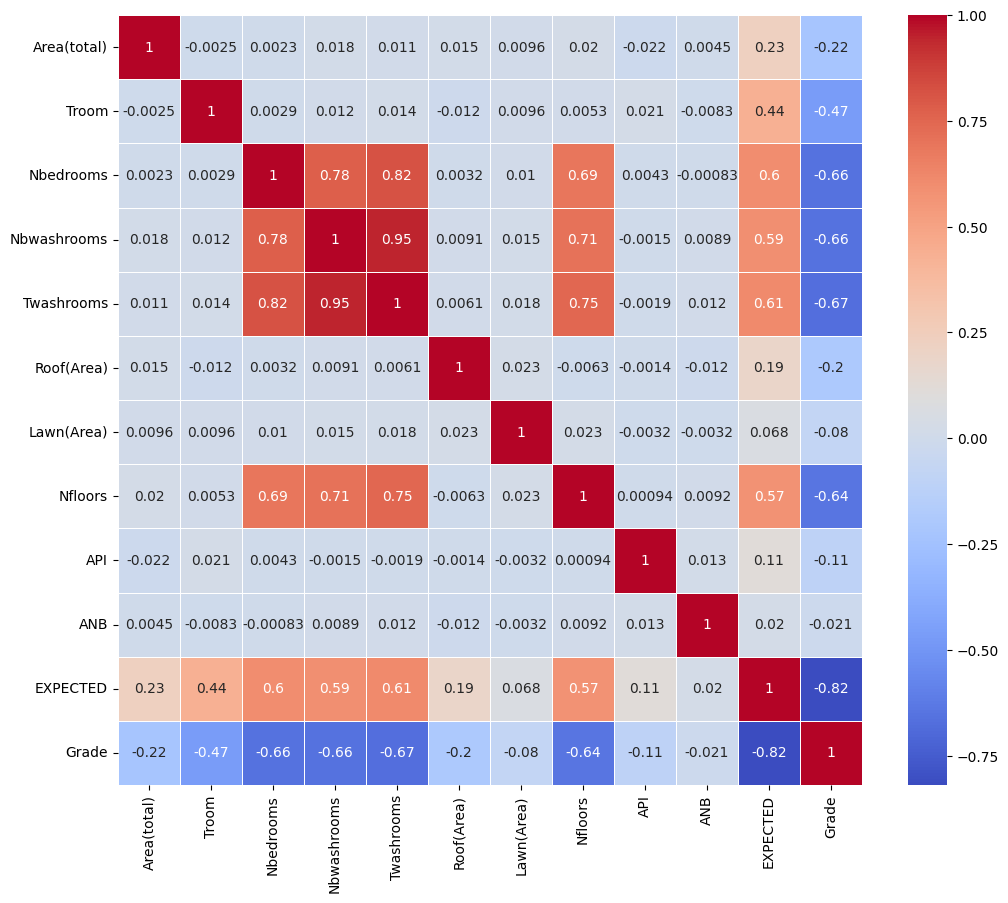

In [810]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Setting the size of the heatmap

# Creating a heatmap for the correlation matrix of the specified column
sns.heatmap(house.corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Displaying the plot
plt.show()


In [811]:
house.shape[1]

12

In [812]:
house.shape

(7000, 12)

<h3><b> Spliting the Data </b></h3> ----> Into train and test(validation) :- train_test_split()

In [813]:
house.sample(2)

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
id,,,,,,,,,,,,
3825,349,7.0,2.0,3.0,4.0,106.0,99.0,4,60.0,5,677,2
5066,294,9.0,4.0,2.0,3.0,89.0,94.0,1,65.0,3,447,2


In [814]:
X = house.values[:,:-1]
Y = house.values[:,-1]

In [815]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25,random_state = 45)

<h3><b> Scalling the Data </B></h3> ----> Using StandardScaler

In [816]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [817]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = house.columns[:-1])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = house.columns[:-1])

In [818]:
X_train = X_train_scaled
X_test = X_test_scaled

In [819]:
# x_train

In [820]:
# x_test

<h1><b> Mutilple Machine learning Models </b></h1>---> We're constructing a predictive model for house grades using our dataset

In [821]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [822]:
# Define hyperparameters for each model
log_reg_params = {'max_iter': [100, 500, 1000], 'C': [0.1, 1.0, 10.0]}
svc_params = {'C': [0.1, 1.0, 10.0,320],'gamma': [0.020], 'kernel': ['linear', 'rbf'],'random_state' : [17]}
knn_params = {'n_neighbors': [3, 5, 7]}
dtc_params = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rfc_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
xgbc_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 10]}

# GridSearchCV for each model
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=3, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)
log_reg_best = log_reg_grid.best_estimator_
y_pred_log_reg = log_reg_best.predict(X_test)

svc_grid = GridSearchCV(SVC(), svc_params, cv=3, scoring='accuracy')
svc_grid.fit(X_train, y_train)
svc_best = svc_grid.best_estimator_
y_pred_svc = svc_best.predict(X_test)

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='accuracy')
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

dtc_grid = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=3, scoring='accuracy')
dtc_grid.fit(X_train, y_train)
dtc_best = dtc_grid.best_estimator_
y_pred_dtc = dtc_best.predict(X_test)

rfc_grid = GridSearchCV(RandomForestClassifier(), rfc_params, cv=3, scoring='accuracy')
rfc_grid.fit(X_train, y_train)
rfc_best = rfc_grid.best_estimator_
y_pred_rfc = rfc_best.predict(X_test)

xgbc_grid = GridSearchCV(XGBClassifier(), xgbc_params, cv=3, scoring='accuracy')
xgbc_grid.fit(X_train, y_train)
xgbc_best = xgbc_grid.best_estimator_
y_pred_xgbc = xgbc_best.predict(X_test)


In [823]:
# Function to get classification metrics
def get_classification_metrics(y_true, y_pred, model_name, average='weighted'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    confusion_mat = confusion_matrix(y_true, y_pred)
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': confusion_mat}

# Calculate and print metrics for each model without any averaging strategy (average=None)
metrics_log_reg = get_classification_metrics(y_test, y_pred_log_reg, "Logistic Regression", average=None)
print(metrics_log_reg)

metrics_svc = get_classification_metrics(y_test, y_pred_svc, "Support Vector Classifier", average=None)
print(metrics_svc)

metrics_knn = get_classification_metrics(y_test, y_pred_knn, "KNeighborsClassifier", average=None)
print(metrics_knn)

metrics_dtc = get_classification_metrics(y_test, y_pred_dtc, "DecisionTreeClassifier", average=None)
print(metrics_dtc)

metrics_rfc = get_classification_metrics(y_test, y_pred_rfc, "RandomForestClassifier", average=None)
print(metrics_rfc)

metrics_xgbc = get_classification_metrics(y_test, y_pred_xgbc, "XGBClassifier", average=None)
print(metrics_xgbc)

{'Model': 'Logistic Regression', 'Accuracy': 0.9074285714285715, 'Precision': array([0.96938776, 0.88709677, 0.90206186, 0.91767068, 1.        ]), 'Recall': array([0.86363636, 0.89673913, 0.91264668, 0.91767068, 0.85714286]), 'F1 Score': array([0.91346154, 0.89189189, 0.9073234 , 0.91767068, 0.92307692]), 'Confusion Matrix': array([[ 95,  15,   0,   0,   0],
       [  3, 330,  35,   0,   0],
       [  0,  27, 700,  40,   0],
       [  0,   0,  41, 457,   0],
       [  0,   0,   0,   1,   6]])}
{'Model': 'Support Vector Classifier', 'Accuracy': 0.968, 'Precision': array([0.96330275, 0.96657382, 0.96757458, 0.972167  , 0.875     ]), 'Recall': array([0.95454545, 0.94293478, 0.9726206 , 0.98192771, 1.        ]), 'F1 Score': array([0.95890411, 0.95460798, 0.97009103, 0.97702298, 0.93333333]), 'Confusion Matrix': array([[105,   5,   0,   0,   0],
       [  4, 347,  17,   0,   0],
       [  0,   7, 746,  14,   0],
       [  0,   0,   8, 489,   1],
       [  0,   0,   0,   0,   7]])}
{'Model':

<h1><b> Test Dataset </b></h1>

We will use the same steps on the test data as we did on the training data, including the SVC Model we've seen before, to achieve the highest accuracy.

In [824]:
test = pd.read_csv(r'/content/drive/MyDrive/Github/Hackathon Projects/House pred/Dataset/TEST_.csv',header = 0,index_col=0 )

In [825]:
test.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
id,,,,,,,,,,,,,
1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$,B
2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$,D
3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$,C
4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$,B
5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$,D


In [826]:
test.shape

(3299, 13)

In [827]:
test.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED',
       'Grade'],
      dtype='object')

In [828]:
test.isnull().sum()

Area(total)      0
Troom            1
Nbedrooms        1
Nbwashrooms      1
Twashrooms       0
roof           653
Roof(Area)     653
Lawn(Area)       1
Nfloors          0
API              1
ANB              0
EXPECTED         0
Grade            0
dtype: int64

<h3><b> Drop the Column </b></h3>

In [829]:
test.drop(columns=['roof'],axis= 1, inplace=True)

In [830]:
test["Roof(Area)"].fillna("Null", inplace = True)

In [831]:
test["Roof(Area)"].replace("Null",93.2,inplace = True)

In [832]:
test["Roof(Area)"].value_counts()

0.0      1340
93.2      653
84.0       44
105.0      40
113.0      35
88.0       34
96.0       34
116.0      33
117.0      33
112.0      32
80.0       32
90.0       30
75.0       30
118.0      30
95.0       29
103.0      29
120.0      29
86.0       29
97.0       28
91.0       28
98.0       28
93.0       27
114.0      27
102.0      27
94.0       26
79.0       25
82.0       25
78.0       25
115.0      25
92.0       25
81.0       24
87.0       24
100.0      24
77.0       24
72.0       24
85.0       23
73.0       23
107.0      22
76.0       22
74.0       22
108.0      21
109.0      21
119.0      21
83.0       21
71.0       21
111.0      20
99.0       20
101.0      19
104.0      18
106.0      18
110.0      18
89.0       17
Name: Roof(Area), dtype: int64

<h3><b> Missing Data Imputation </b></h3>

In [833]:
for x in test.columns:
    if test[x].dtype=="object" or test[x].dtype=="bool":
        test[x].fillna(test[x].mode()[0], inplace=True)
    elif test[x].dtype=="int64" or test[x].dtype=="float64":
        test[x].fillna(round(test[x].mean()), inplace=True)

In [834]:
test.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
Grade          0
dtype: int64

In [835]:
test.shape

(3299, 12)

<h3><b> LabelEncoder() </b></h3>---> Convert Categorical Data to Numerical

In [836]:
col=[]
for x in test.columns:
  if test[x].dtypes == "object":
    col.append(x)
col

['EXPECTED', 'Grade']

In [837]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    test[x]=le.fit_transform(test[x])

In [838]:
test.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
id,,,,,,,,,,,,
1,348,9.0,5.0,3.0,5,93.2,84.0,5,91.0,6,1111,1
2,311,6.0,5.0,5.0,6,0.0,86.0,6,83.0,4,237,3
3,342,5.0,6.0,6.0,7,120.0,85.0,4,95.0,5,796,2
4,329,7.0,7.0,4.0,6,93.2,105.0,5,97.0,6,1023,1
5,307,6.0,2.0,3.0,4,0.0,76.0,2,64.0,4,27,3


In [839]:
test.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED',
       'Grade'],
      dtype='object')

In [840]:
X = test.values[:,:-1]
Y = test.values[:,-1]

In [841]:
X.shape,Y.shape

((3299, 11), (3299,))

<h3><b> Standardize test data </b></h3>

In [842]:
X = scaler.transform(X)

In [843]:
# print(X)

<h1><b> SVM - Test Model </b></h1>



In [844]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# svc_best.fit(X_train, y_train)
Y_pred = svc_best.predict(X)

In [845]:
print("x_train,y_train",svc_best.score(X_train,y_train))
print("accuracy score",accuracy_score(Y, Y_pred))

x_train,y_train 0.9927619047619047
accuracy score 0.9730221279175508


In [846]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y, Y_pred)
print("Confusion Matrix for SVC:")
print(cfm)

classification_rep = classification_report(Y, Y_pred)
print("Classification Report for SVC:")
print(classification_rep)

accuracy_score = accuracy_score(Y, Y_pred)
print("Accuracy of the SVC model:", accuracy_score)


#---------------------------------  The Model is Performing Good  ---------------------------------#

Confusion Matrix for SVC:
[[ 166    8    0    0    0]
 [   9  662   20    0    0]
 [   0    8 1360   19    0]
 [   0    0   21 1011    3]
 [   0    0    0    1   11]]
Classification Report for SVC:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       174
         1.0       0.98      0.96      0.97       691
         2.0       0.97      0.98      0.98      1387
         3.0       0.98      0.98      0.98      1035
         4.0       0.79      0.92      0.85        12

    accuracy                           0.97      3299
   macro avg       0.93      0.96      0.94      3299
weighted avg       0.97      0.97      0.97      3299

Accuracy of the SVC model: 0.9730221279175508


<h1><b> Summary : House Grade Prediction </b></h1>

<h4>
    <p>
        We successfully improved the accuracy of our house grade predictions. Utilizing Support Vector Classification (SVC), our model achieved an impressive accuracy of 97.30% on the test data. Through strategic feature engineering, including the removal of a specific column and smart handling of missing data, we significantly boosted our prediction accuracy.
    </p>
    <p>
        While SVC proved to be a star performer in our experiments, we acknowledge that there's always room for exploration. We recommend trying out additional approaches and methodologies to discover if there's an even more effective way to predict house grades. Continuous experimentation and refinement can lead to further enhancements in our predictive models.
    </p>
</h4>


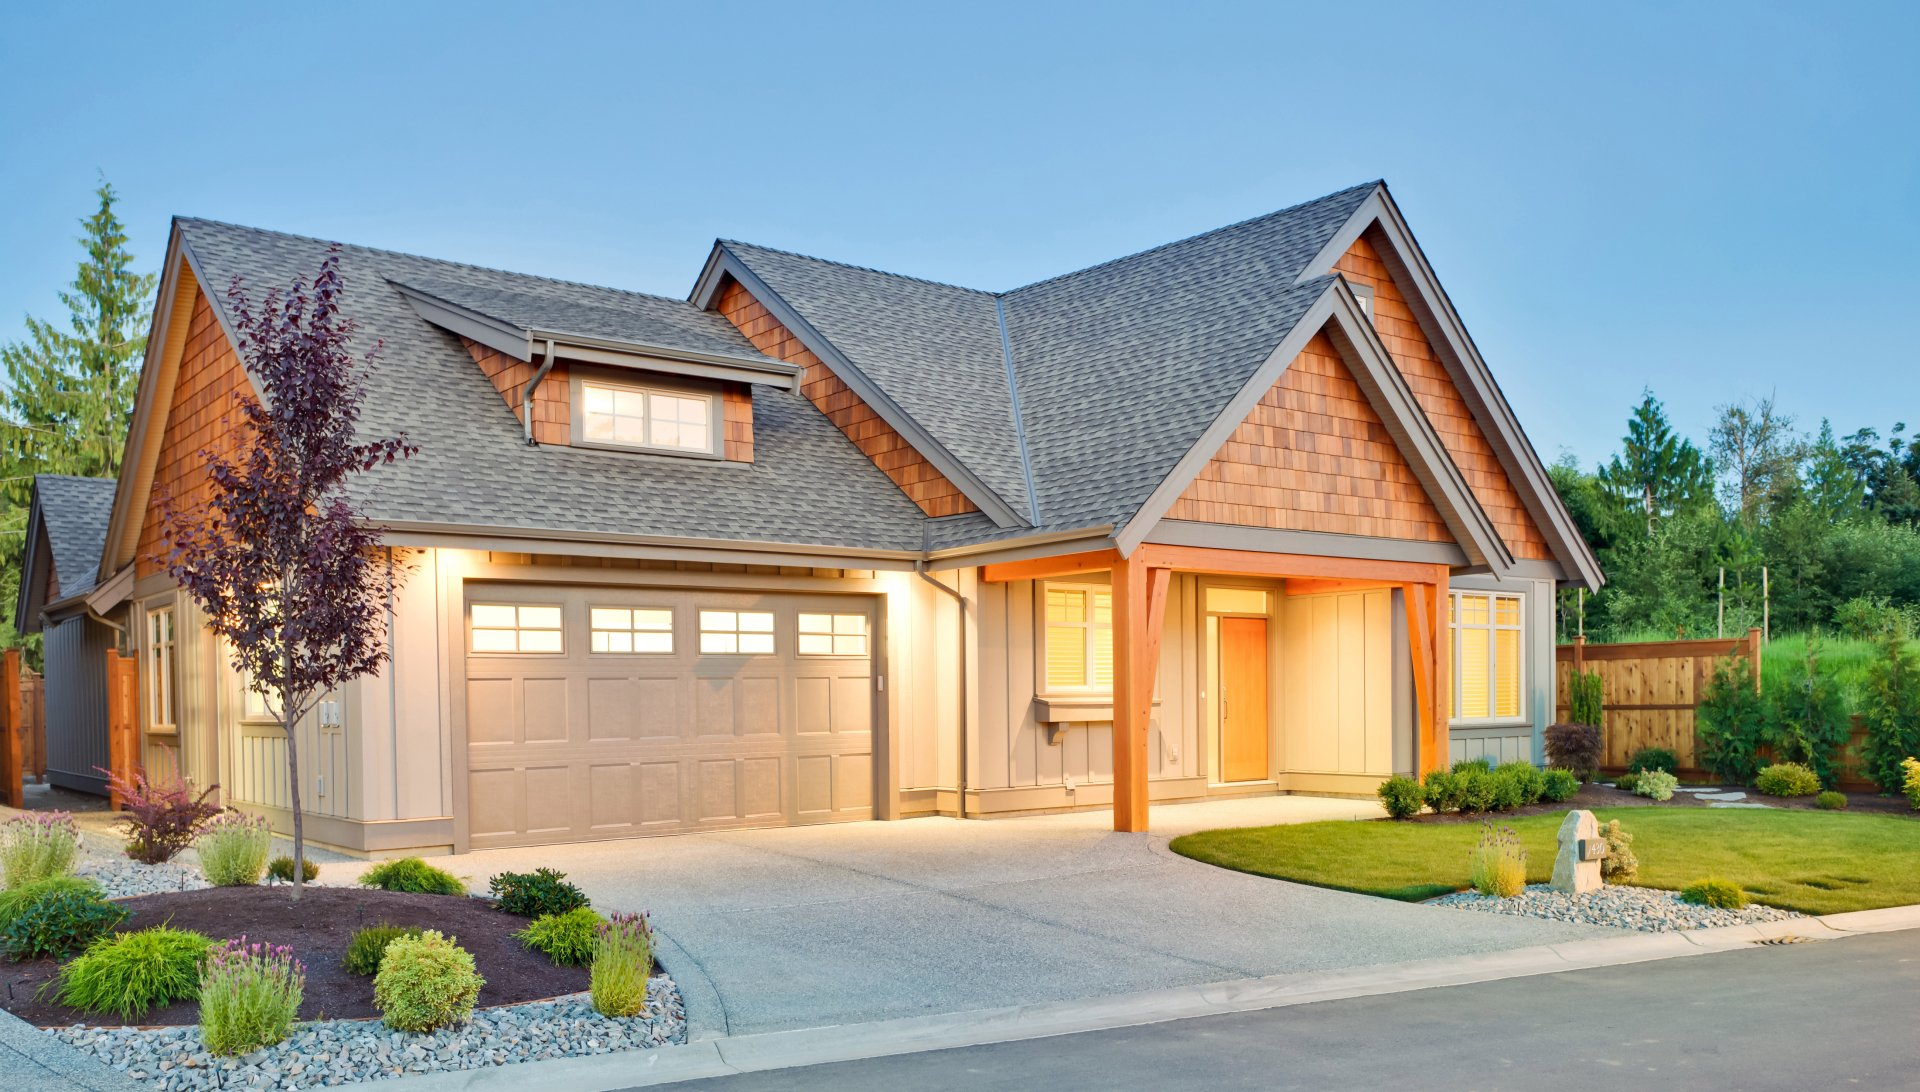

<h1><b> Thank You </b>!</h1>